In [3]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

from pandas import *

# Set the DataFram in pandas to show all columns and 500 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

# Load Data

<Item title:"SAC_NNIP_Polygons" type:Feature Layer Collection owner:Anooshi>
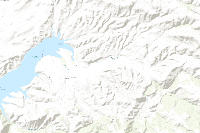

In [4]:
# Load data from arcGIS online for excel export
output = arcGIS_data_load('01323e485a214c6d803b974fed311793')

data = output['data0']
feature_service = output['feature_service']

In [5]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2019

Analysis for 2019-10-01 07:00 UTC to 2020-10-01 07:00 UTC
Entries in Subset: 487


# QAQC

In [6]:
validate_domains(feature_service)



Table/Layer:  Polygons


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,{Janel Mayo}
0,Surveyor_2,{Janel Mayo}


In [7]:
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Sci
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Treatment_Status
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


In [8]:
find_blank_entries(data, exclude_cols=['Surveyor_2', 'Comments'])

No blank Shape__Length
No blank Species_Sci
No blank OBJECTID
No blank Shape__Area
No blank Observation_Date
No blank GlobalID
No blank Treatment_Status
No blank Surveyor_1
No blank SHAPE


../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


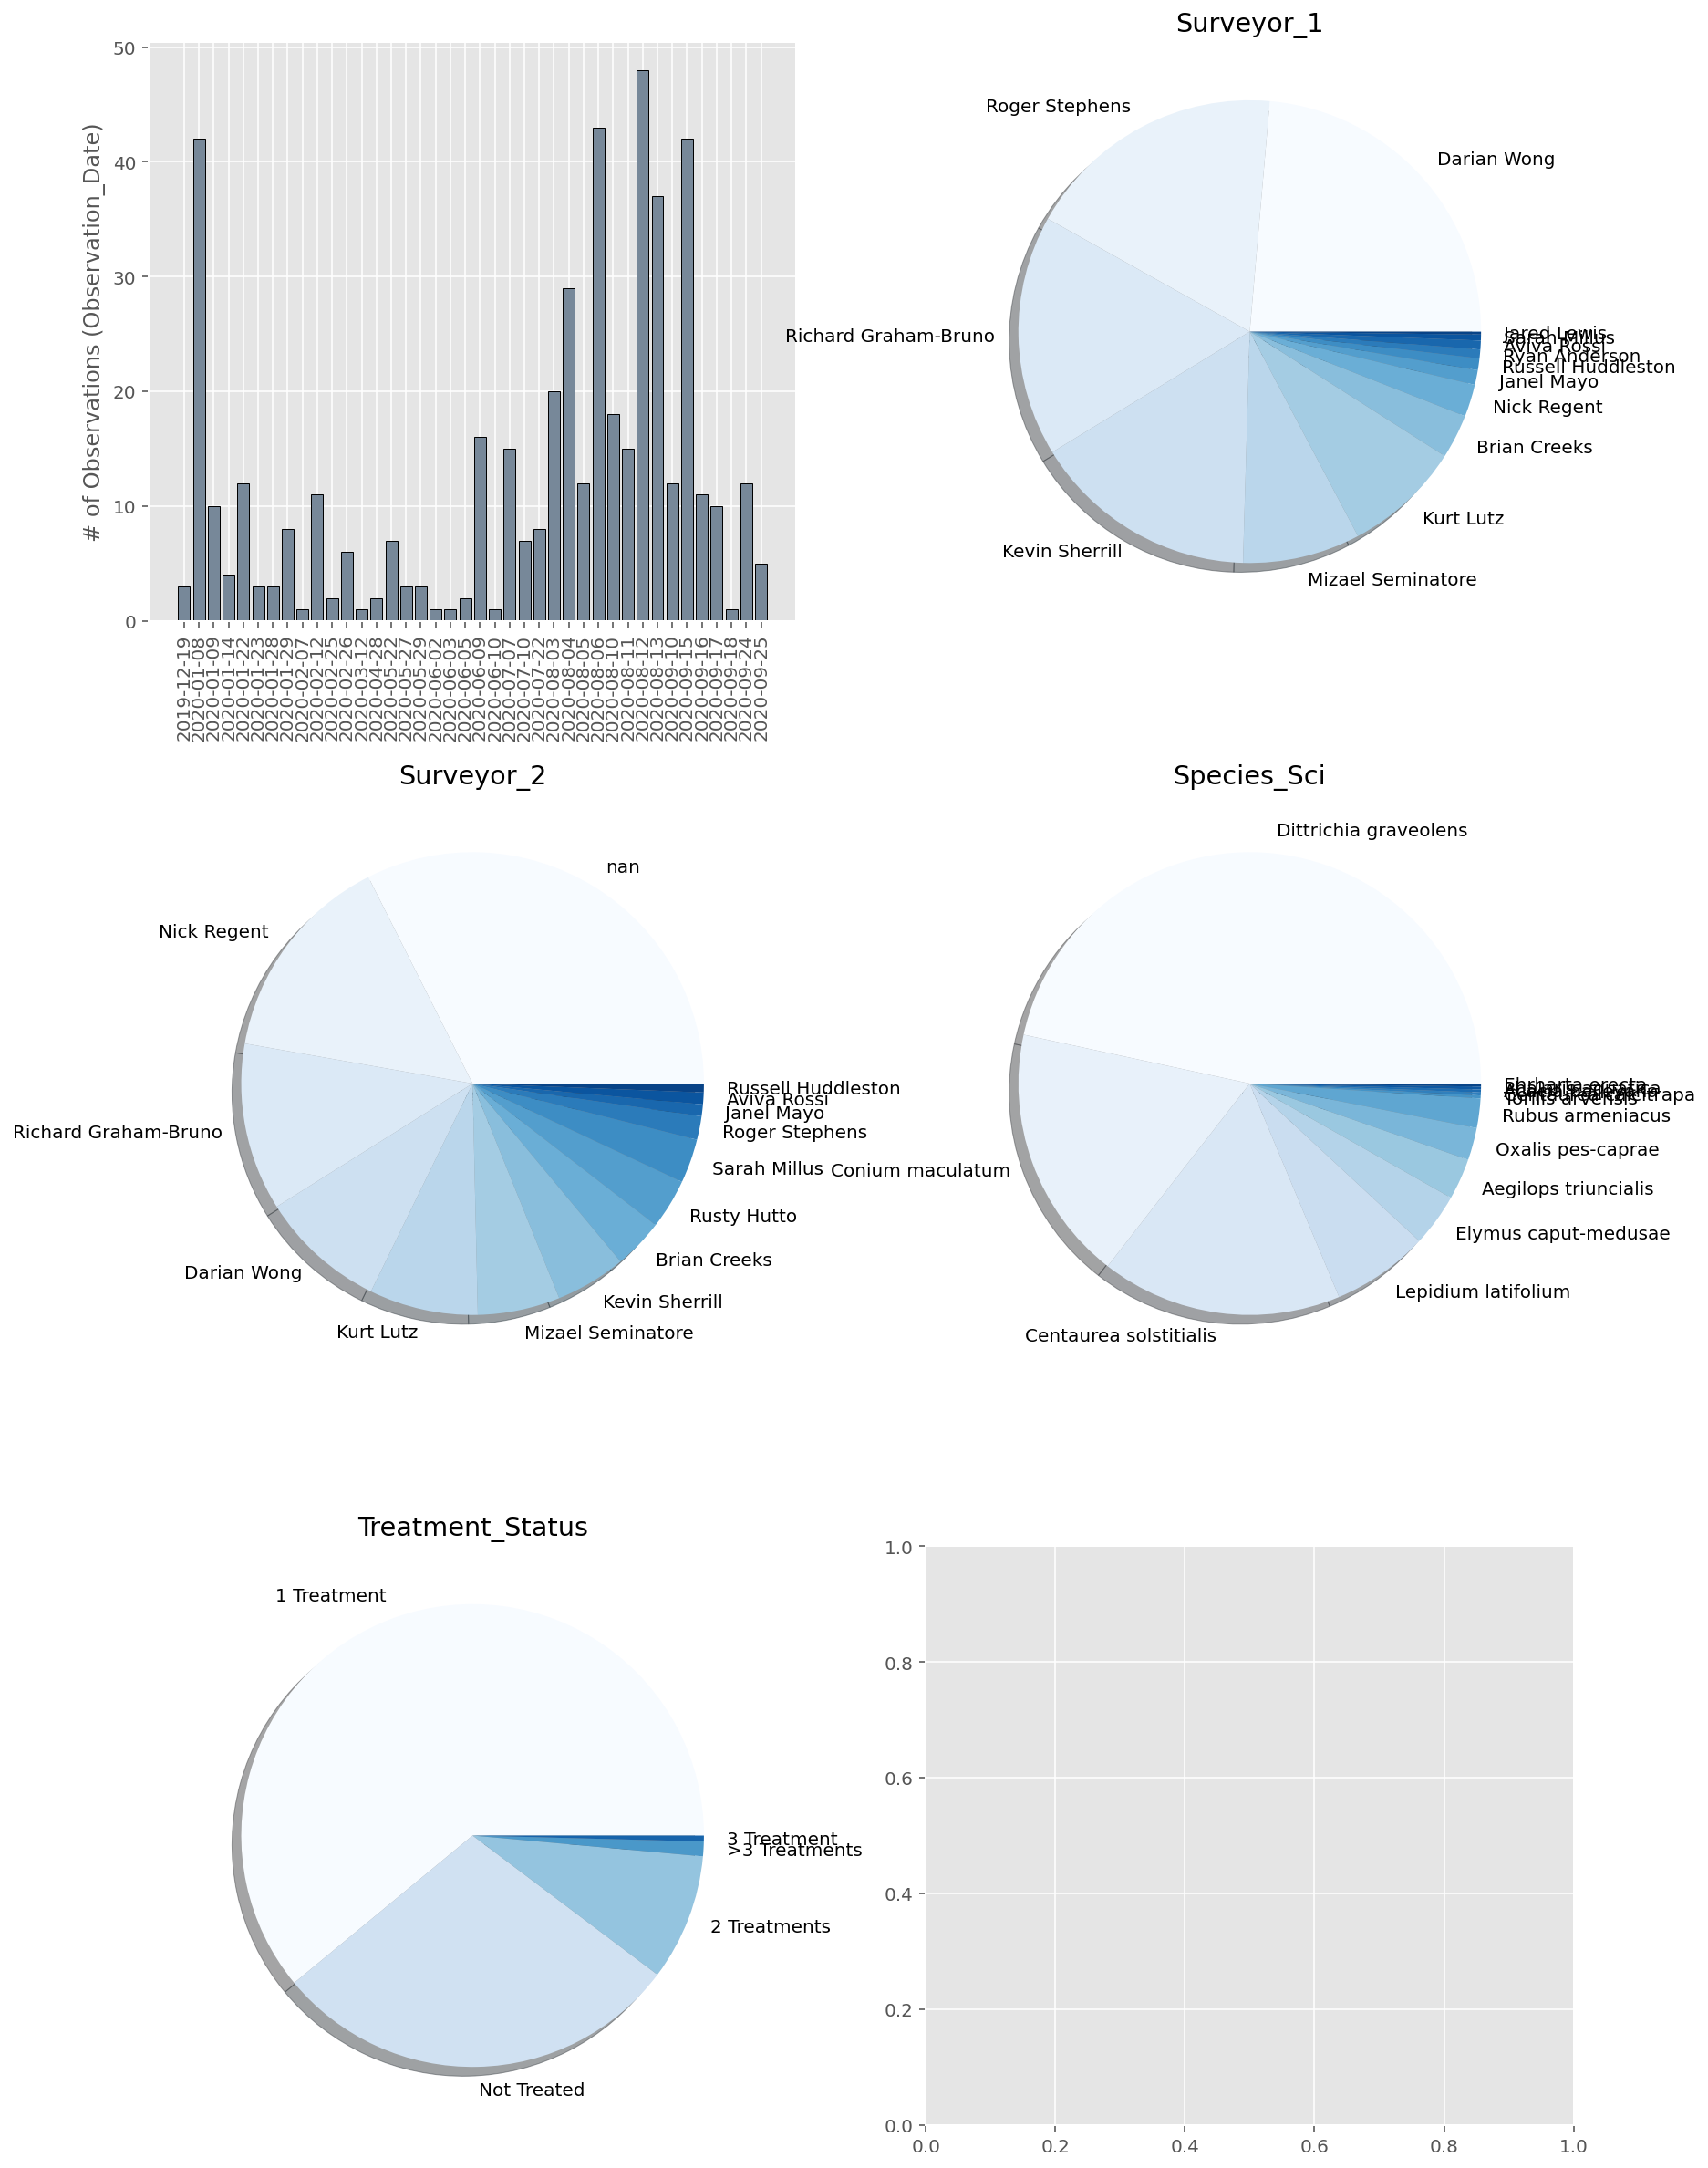

In [10]:
QAQC_plot(sub,cols_to_plot=['Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Species_Sci','Treatment_Status'])